<a href="https://colab.research.google.com/github/Rakesh-SSN/FYP/blob/master/BERT%20TAMIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')


import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")



!pip install transformers

Found GPU at: /device:GPU:0
There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("/content/drive/My Drive/FYP/bert/glue/cola/tamil/task1tamil.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(10)

Number of training sentences: 2,500



,sentence_source,label,label_notes,sentence
1447,TAM1448,0,a,கலாபவன்மணிக்கு மது பழக்கம் காரணமாக கல்லீரல் பா...
1114,TAM1115,0,a,இந்த 112 சிலைகளையும் ஆய்வு செய்ய மத்திய தொல்லி...
1064,TAM1065,0,a,போராட்டம் நடந்து வரும் நிலையில் மதுரையில் ஒரு ...
2287,TAM2288,0,a,"இந்தியாவுடன், ஐதராபாத் பகுதியை இணைக்க, நிஜாம் ..."
1537,TAM1538,0,a,பழம்பெரும் திரைப்பட இயக்குனர் திருலோகசந்தர் மற...
668,TAM0669,1,a,ஜல்லிக்கட்டு விவகாரதில் விலங்குகள் நலவாரியத்து...
1583,TAM1584,0,a,இந்த சம்பவம் பற்றி புதிய தகவல்களை இந்திய ராணுவ...
2404,TAM2405,0,a,"ஜம்மு - காஷ்மீர் மாநிலத்தில், பா.ஜ., மற்றும் ம..."
497,TAM0498,1,a,சந்திரபாபு நாயுடு அரசை கண்டித்து ஜெகன் மோகன் ர...
2480,TAM2481,0,a,"லெக் பீஸ்' வேண்டாம்; முழு கோழின்னா 'ஓ.கே.,!'அம..."


In [130]:
df.loc[df.label == 0].sample(5)[['sentence', 'label']]

,sentence,label
1673,கோயம்பேடு மார்க்கெட்டில் ஒரு கிலோ தக்காளி ரூ. ...,0
1802,ஏழை மக்களும் மருத்துவ வசதிகளை எளிதாகப் பெறுவதை...,0
1351,புரோக்கர்கள் பவித்ராவுக்கு பெற்றோர் கிடையாது.<...,0
1714,இதைமுன்னிட்டு ஜனாதிபதி தேர்தல் நடத்தப்பட உள்ளத...,0
1001,தமிழகத்தில் மீண்டும் ஆட்சியில் அமர அ.தி.மு.க.-...,0


In [0]:
sentences = df.sentence.values
labels = df.label.values

In [132]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=True)

Loading BERT tokenizer...


In [133]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  சங்கராபுரம் தொகுதியில் போட்டியிடும் ஸ்டாலின் நடைபயணமாக சென்று பிரசாரம் செய்தார்.<eol>தி.மு.க., வேட்பாளர் ஸ்டாலின் போட்டியிடும் சங்கராபுரம் தொகுதியில் சின்ன சேலம் பகுதியில் நடைபயணமாக சென்று ஓட்டு சேகரித்தார்.
Tokenized:  ['ச', '##ங', '##க', '##ரா', '##பு', '##ர', '##ம', 'த', '##ெ', '##ாக', '##ு', '##திய', '##ில', 'ப', '##ே', '##ா', '##ட', '##டி', '##ய', '##ி', '##டு', '##ம', 'ஸ', '##ட', '##ால', '##ி', '##ன', 'ந', '##டை', '##ப', '##ய', '##ண', '##மாக', 'ச', '##ெ', '##ன', '##று', 'பி', '##ர', '##ச', '##ார', '##ம', 'ச', '##ெ', '##ய', '##தா', '##ர', '.', '<', 'eo', '##l', '>', 'தி', '.', 'மு', '.', 'க', '.', ',', 'வ', '##ே', '##ட', '##பா', '##ள', '##ர', 'ஸ', '##ட', '##ால', '##ி', '##ன', 'ப', '##ே', '##ா', '##ட', '##டி', '##ய', '##ி', '##டு', '##ம', 'ச', '##ங', '##க', '##ரா', '##பு', '##ர', '##ம', 'த', '##ெ', '##ாக', '##ு', '##திய', '##ில', 'சி', '##ன', '##ன', 'ச', '##ே', '##ல', '##ம', 'பகுதி', '##ய', '##ில', 'ந', '##டை', '##ப', '##ய', '##ண', '##மாக', 'ச', '##ெ', '##ன', '##று', 'ஓ

In [134]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                        # This function also supports truncation and conversion
                        # to pytorch tensors, but we need to do padding, so we
                        # can't use these features :( .
                        #max_length = 128,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  சங்கராபுரம் தொகுதியில் போட்டியிடும் ஸ்டாலின் நடைபயணமாக சென்று பிரசாரம் செய்தார்.<eol>தி.மு.க., வேட்பாளர் ஸ்டாலின் போட்டியிடும் சங்கராபுரம் தொகுதியில் சின்ன சேலம் பகுதியில் நடைபயணமாக சென்று ஓட்டு சேகரித்தார்.
Token IDs: [101, 1154, 111305, 19894, 74405, 29972, 21060, 39123, 1159, 111312, 24515, 18660, 85056, 94978, 1162, 18827, 15472, 35186, 24171, 15220, 20242, 35667, 39123, 1172, 35186, 71071, 20242, 17506, 1160, 51177, 46168, 15220, 40397, 22093, 1154, 111312, 17506, 21800, 37076, 21060, 59245, 81773, 39123, 1154, 111312, 15220, 99099, 21060, 119, 133, 13934, 10161, 135, 55993, 119, 95512, 119, 1152, 119, 117, 1170, 18827, 35186, 88626, 55186, 21060, 1172, 35186, 71071, 20242, 17506, 1162, 18827, 15472, 35186, 24171, 15220, 20242, 35667, 39123, 1154, 111305, 19894, 74405, 29972, 21060, 39123, 1159, 111312, 24515, 18660, 85056, 94978, 86625, 17506, 17506, 1154, 18827, 27885, 39123, 81512, 15220, 94978, 1160, 51177, 46168, 15220, 40397, 22093, 1154, 111312, 17506, 21800, 115

In [135]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  306


In [136]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 47...
MAX_LEN = 64

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 64 values...

Padding token: "[PAD]", ID: 0

Done.


In [0]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:
    
    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]
    
    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

In [138]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.2)
print(train_inputs)
print(train_labels)

# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.2)
#print(train_masks)

[[   101   1154  35186 ...  55186  95512  31484]
 [   101   1170 111305 ...   1154 111312  15220]
 [   101   1163  14124 ...  28065    119    133]
 ...
 [   101   1163  27883 ...  27885   1165  18827]
 [   101  49189  66171 ...  86728  81773  20242]
 [   101   1142  46168 ...  37076  24171  19894]]
[1 0 1 ... 1 0 0]


In [0]:
# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.


train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [0]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 32

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


In [141]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [142]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (119547, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              

In [0]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [0]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [0]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [0]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [0]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch    40  of     63.    Elapsed: 0:00:17.


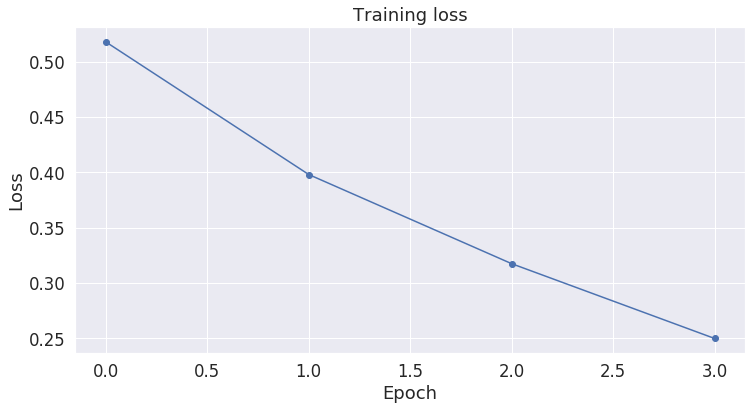

In [116]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [117]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("/content/drive/My Drive/FYP/bert/glue/cola/testdata/task1tamil-test.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.sentence.values
labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 900



In [118]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]
  
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)
  # # print(predictions)
  #print(true_labels)
print('    DONE.')

#print(true_labels)
print("*************************")

#print(len(predictions))
#print(outputs)


    


Predicting labels for 900 test sentences...
    DONE.
*************************


In [0]:
import numpy as np
np.savetxt("/content/drive/My Drive/FYP/bert/glue/cola/task1tamil-results.txt",predictions, fmt="%s")



In [120]:

count_NP=0
count_P=0
count_line=1
x=-1
true_count,false_count=0,0
print("label \t sno\tlogit\t\t\t\t\tindex")
for i in range(len(predictions)):
  for j in range(len(predictions[i])):
    print("(",end="")
    print(true_labels[i][j],end="")
    print(")",end="")
    print("\t",count_line,end="")
    # print("-  ",end="")
    if(predictions[i][j][0]>predictions[i][j][1] ):
      #count_P+=1 
      #print(" Non Paraphrase         ",end="")
      print("\t",predictions[i][j],"\t0\t",end="")
      x=0
    elif(predictions[i][j][1]>predictions[i][j][0] ):
      #print(" Paraphrase     ",end="")
     # count_NP+=1      
      print("\t",predictions[i][j],"\t1\t",end="")
      x=1
    # elif(predictions[i][j][2]>predictions[i][j][0] and predictions[i][j][2]>predictions[i][j][1]):
    #   #print(" Semi Paraphrase     ",end="")
    #   #count_NP+=1      
    #   print("\t",predictions[i][j][2],"\t2\t",end="")
    #   x=1
    count_line+=1
    #print("\t",predictions[i][j],"\t2\t",end="")

    if(true_labels[i][j]==x):
      true_count+=1
      print("true")
    else:
      print("false")
      false_count+=1

print("Number of true predictions:",true_count)
print("Number of false predictions:",false_count)

label 	 sno	logit					index
(1)	 1	 [-0.5456994  0.732782 ] 	1	true
(1)	 2	 [ 0.5166146 -0.426691 ] 	0	false
(1)	 3	 [ 1.2967467 -1.3812047] 	0	false
(1)	 4	 [ 1.8449718 -2.0012856] 	0	false
(0)	 5	 [ 1.91249   -2.0178878] 	0	true
(1)	 6	 [ 1.7854174 -1.997591 ] 	0	false
(0)	 7	 [ 1.7481251 -1.6004115] 	0	true
(0)	 8	 [ 0.4306795 -1.2885145] 	0	true
(0)	 9	 [ 1.9767358 -1.9538733] 	0	true
(0)	 10	 [ 1.6641582 -1.4584348] 	0	true
(1)	 11	 [ 0.79266983 -1.5292628 ] 	0	false
(0)	 12	 [ 1.869667  -1.8243428] 	0	true
(0)	 13	 [ 0.94122535 -0.7965241 ] 	0	true
(0)	 14	 [ 2.011632  -2.0073414] 	0	true
(0)	 15	 [ 0.69286263 -1.4848948 ] 	0	true
(0)	 16	 [ 1.2394059 -1.0832901] 	0	true
(0)	 17	 [ 1.9161264 -2.0124786] 	0	true
(0)	 18	 [ 0.78607786 -0.9764685 ] 	0	true
(0)	 19	 [ 0.92464817 -1.6084503 ] 	0	true
(0)	 20	 [ 1.9609706 -1.9203229] 	0	true
(0)	 21	 [ 1.4463152 -1.3738232] 	0	true
(1)	 22	 [-0.1975999   0.76718605] 	1	true
(0)	 23	 [ 1.9623102 -1.9752854] 	0	true
(0)	 24	 [-0.00198125

In [121]:
print("Accuracy:",true_count/count_line*100,"%")

Accuracy: 57.71365149833518 %


In [0]:
#print('True positives: %d of %d (%.2f%%)' % (df.label.sum(), len(df.label), (df.label.sum() / len(df.label) * 100.0)))

In [123]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  

  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)
  
 # print(pred_labels_i)



Calculating Matthews Corr. Coef. for each batch...


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [124]:
matthews_set
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.3f' % mcc)

MCC: 0.110


In [125]:
print(flat_predictions)
print("************")
print(flat_true_labels)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 

In [126]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = '/content/drive/My Drive/FYP/bert/model-colab-task1tamil'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Saving model to /content/drive/My Drive/FYP/bert/model-colab-task1tamil


('/content/drive/My Drive/FYP/bert/model-colab-task1tamil/vocab.txt',
 '/content/drive/My Drive/FYP/bert/model-colab-task1tamil/special_tokens_map.json',
 '/content/drive/My Drive/FYP/bert/model-colab-task1tamil/added_tokens.json')